In [25]:
# import library 

library(lubridate)
library(GGally)
library(ggplot2)
#library(hydroGOF)
library(mvtnorm)


In [24]:
# installing to /Users/yennanliu/anaconda3/envs/python_R/lib/R/library/utf8/libs
#install.packages("ggplot2")
#install.packages("lubridate")
#install.packages("GGally")
#install.packages("mvtnorm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
# load the data 
House <- read.csv(file="/Users/yennanliu/analysis/project/rev/Analytics/kc_house_data.csv",head=TRUE,sep=",")

In [33]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [26]:
# data preprocess 
House$date<-(substr(House$date, 1, 8))
House$date<- ymd(House$date)
House$date<-as.numeric(as.Date(House$date, origin = "1900-01-01"))


In [30]:
head(House, n = 3L)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,16356,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,16413,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,16491,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [34]:
# Splitting the Data Set 
ratio = sample(1:nrow(House), size = 0.25*nrow(House))
Test = House[ratio,] #Test dataset 25% of total
Training = House[-ratio,] #Train dataset 75% of total


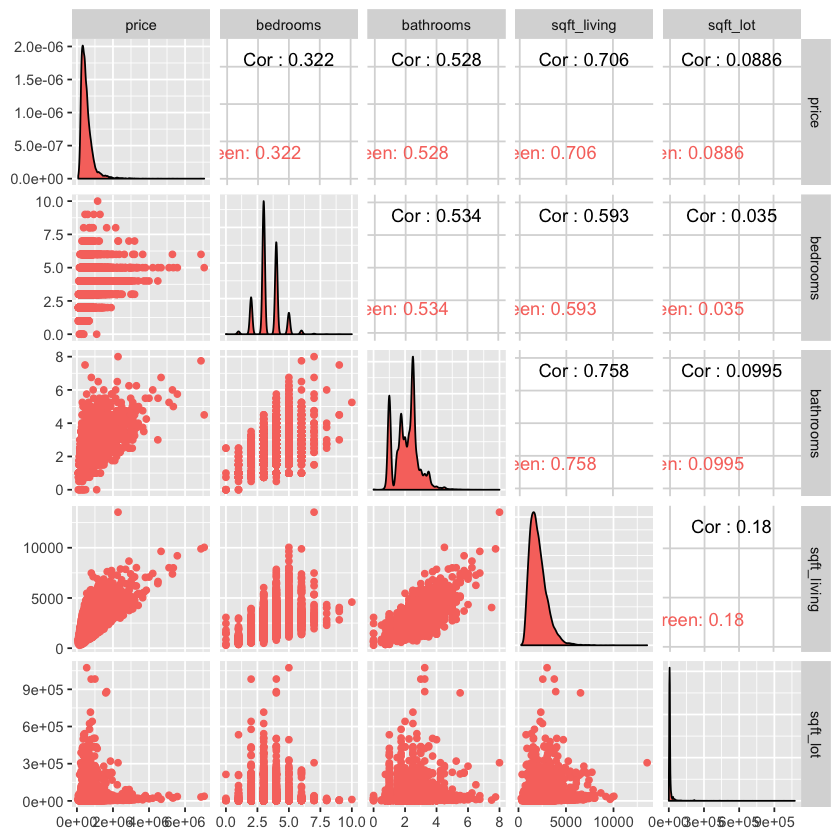

In [37]:
# visualize 1 

## Checking Relationship between price, bedrooms, bathrooms, sqft_living and sqft lot
plot1<-ggpairs(data=Training, columns=3:7,
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot1

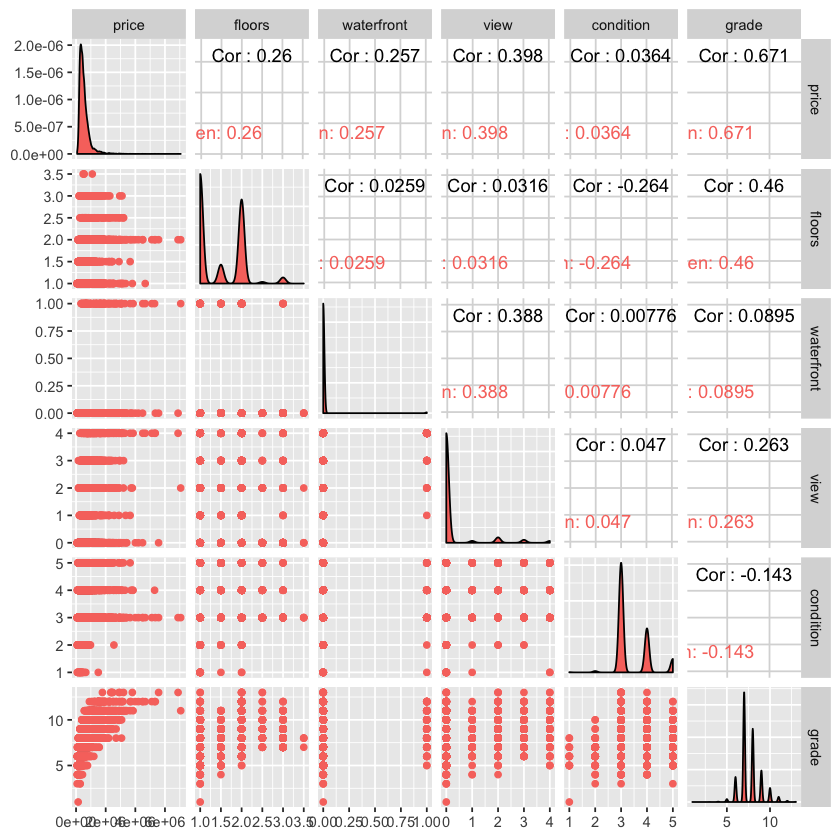

In [39]:
# visualize 2

## Checking Relationship between price, floors, waterfront, view, condition and grade
plot2<-ggpairs(data=Training, columns=c(3,8:12),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot2


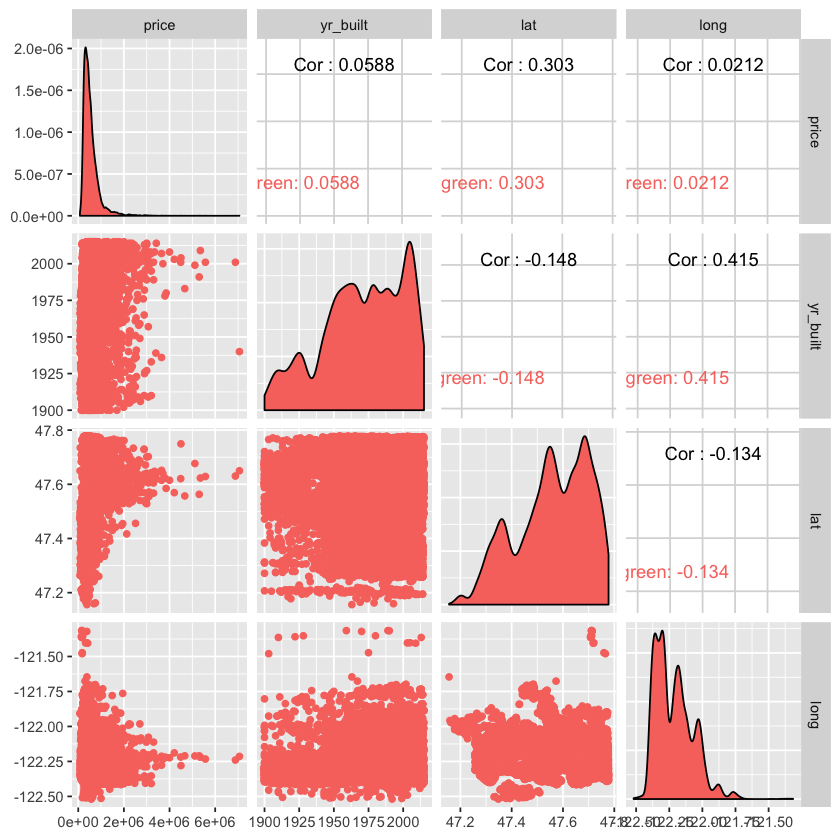

In [40]:
# visualize 3 

## Checking Relationship between price, yr built, lat and long
plot3=ggpairs(data=Training, columns=c(3,15,18,19),
    mapping = aes(color = "dark green"),
    axisLabels="show")
plot3

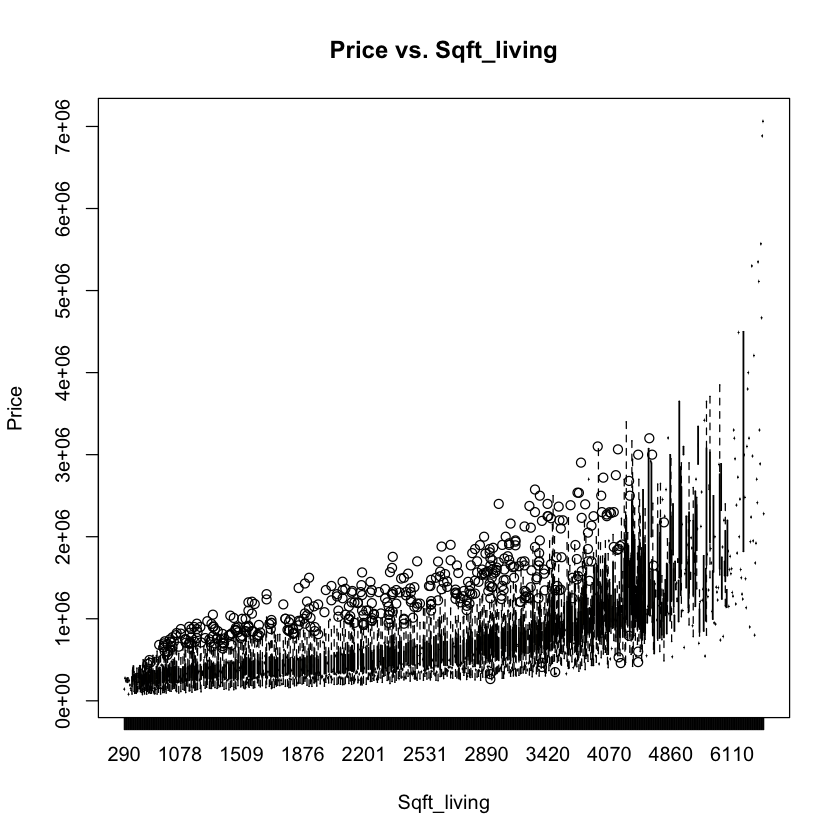

In [41]:
# boxplot 1 

## Price vs. Sqft_living ->> Nice correlation, as sqft increases, price increases as well.
boxplot1=boxplot(price~sqft_living, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Sqft_living", xlab="Sqft_living", ylab="Price")


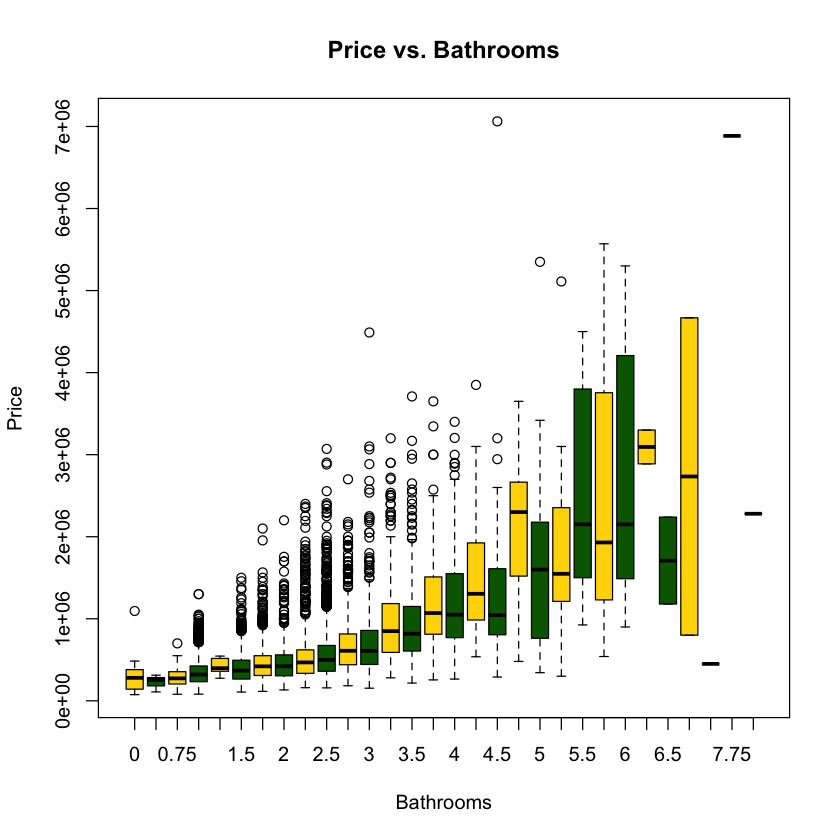

In [42]:
# boxplot 2 


## Price vs. Bathrooms ->> Nice correlation, as # of bahtrooms increases [median of bar plot], price increases as well, with one expection in when bathroom=7
boxplot2=boxplot(price~bathrooms, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Bathrooms", xlab="Bathrooms", ylab="Price")


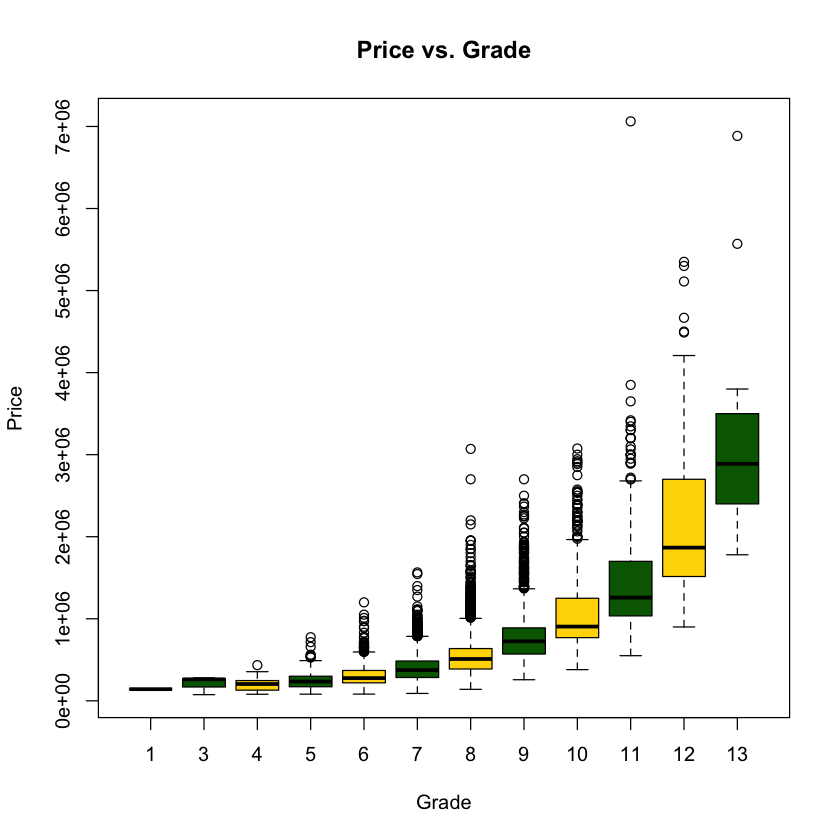

In [43]:
# boxplot 3 

## Price vs. Grade ->> Nice correlation, grade increases [median of bar plot], price increases as well
boxplot3=boxplot(price~grade, data=Training, 
  col=(c("gold","darkgreen")),
  main="Price vs. Grade", xlab="Grade", ylab="Price")

In [44]:
# boxplot ...N

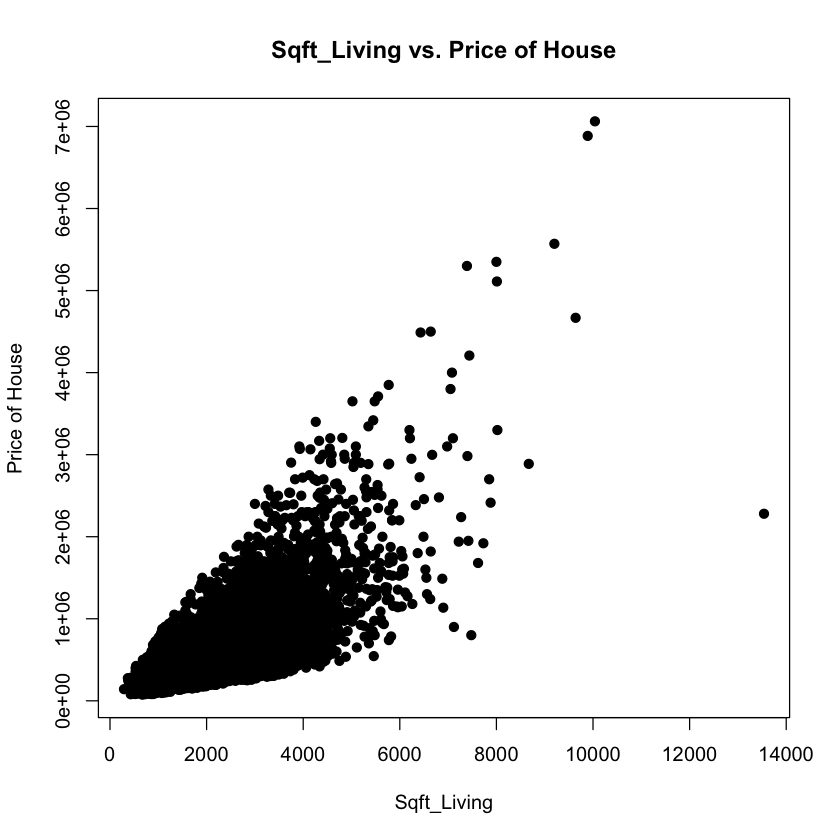

In [45]:
# scatter plot 1 

plot(Training$sqft_living,Training$price, main="Sqft_Living vs. Price of House", xlab="Sqft_Living", ylab="Price of House", pch=19)


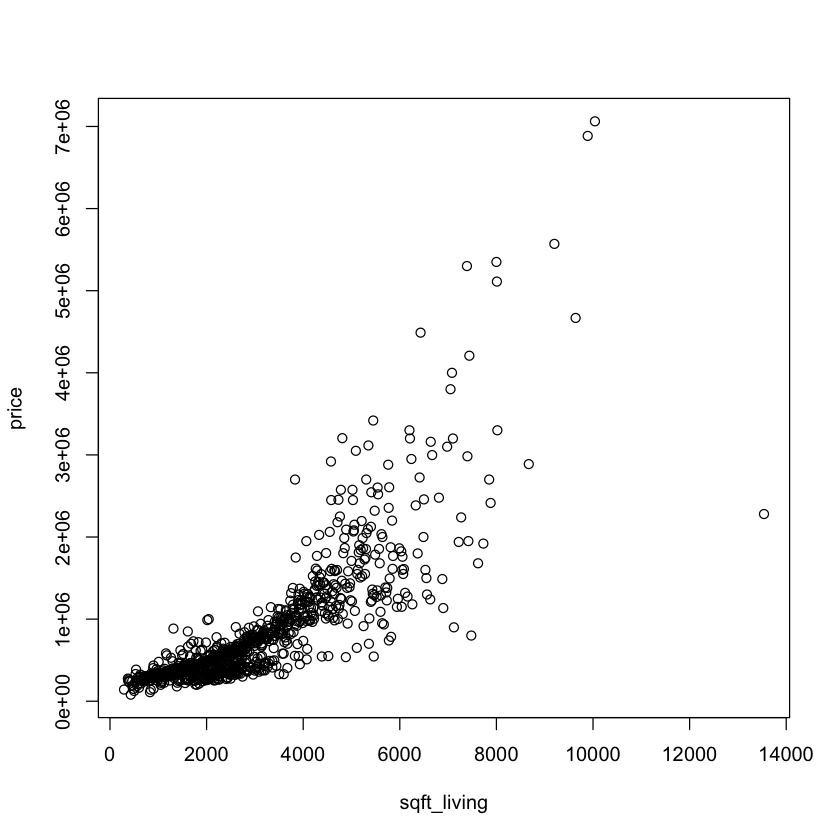

In [47]:
# # scatter plot 2 
## Since this scatterplot is too crowded - I will plot aggregated vectors to see the relationship between 2 variables. 

vec_price_sqftliving <-aggregate(price~sqft_living, FUN=mean, data=Training)
plot(vec_price_sqftliving)
scatterplot1<-recordPlot()

In [48]:
# linear model 

## Plot does not show that price and sqft_living are linearly related. It more looks like an exponential relationship. 
linear_model<-lm(vec_price_sqftliving$price~vec_price_sqftliving$sqft_living)
expo_model<-lm(log(vec_price_sqftliving$price)~vec_price_sqftliving$sqft_living)

cat("Exponential model has ", 100*(summary(expo_model)$r.squared/summary(linear_model)$r.squared-1),"% better R-squared than Linear model, thus relationship between price and sqft_living can be said to be exponential rather than linear.[expo_model R-Squared:",summary(expo_model)$r.squared," linear model R-Squared:",summary(linear_model)$r.squared,"]")



Exponential model has  14.78233 % better R-squared than Linear model, thus relationship between price and sqft_living can be said to be exponential rather than linear.[expo_model R-Squared: 0.7748747  linear model R-Squared: 0.6750818 ]


Call:
lm(formula = price ~ bathrooms, data = average_price_byBathrooms)

Residuals:
     Min       1Q   Median       3Q      Max 
-2545641  -252922  -105969   244513  3781212 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -248782     342219  -0.727    0.473    
bathrooms     432590      75684   5.716 3.94e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 936700 on 28 degrees of freedom
Multiple R-squared:  0.5385,	Adjusted R-squared:  0.522 
F-statistic: 32.67 on 1 and 28 DF,  p-value: 3.943e-06


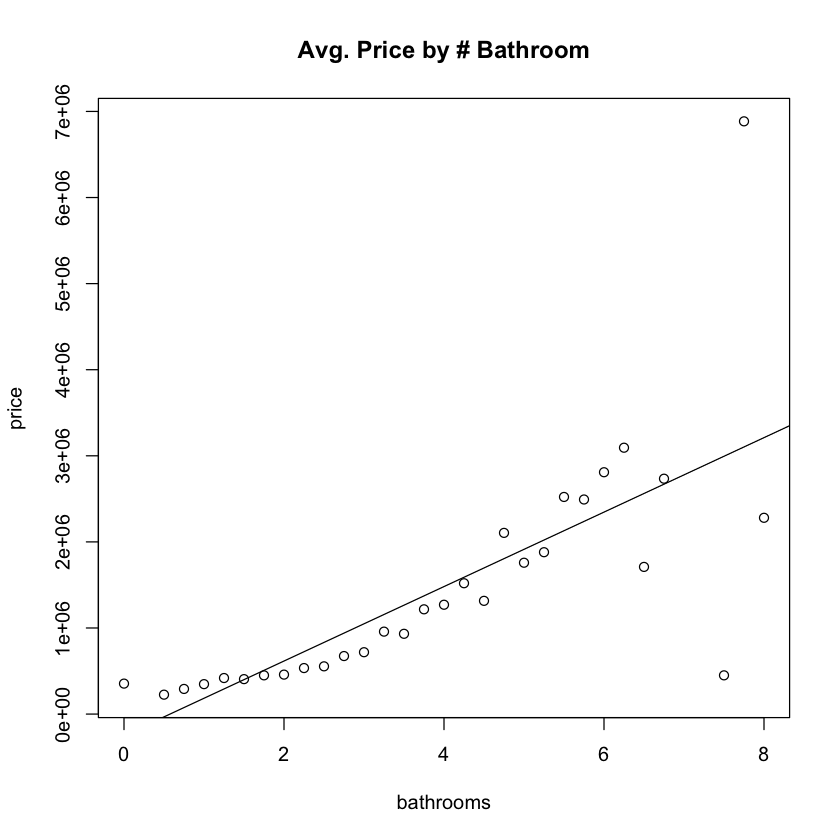

In [49]:

## Ploting average prices in terms of the number of bathrooms and fit a linear model to this graph:

average_price_byBathrooms <-aggregate(price~bathrooms, FUN=mean, data=Training)
plot(average_price_byBathrooms,main="Avg. Price by # Bathroom")
lin_model_bathroom<-lm(price~bathrooms,data=average_price_byBathrooms)
summary(lin_model_bathroom)
abline(lin_model_bathroom)

Warning message:
“‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’”Warning message in svg(tf, width, height, pointsize, FALSE, family, bg, antialias):
“unable to load shared object '/Users/yennanliu/anaconda3/envs/python_R/lib/R/library/grDevices/libs//cairo.so':
  dlopen(/Users/yennanliu/anaconda3/envs/python_R/lib/R/library/grDevices/libs//cairo.so, 6): Symbol not found: _cairo_quartz_font_face_create_for_cgfont
  Referenced from: /Users/yennanliu/anaconda3/envs/python_R/lib/libpangocairo-1.0.0.dylib
  Expected in: /Users/yennanliu/anaconda3/envs/python_R/lib/libcairo.2.dylib
 in /Users/yennanliu/anaconda3/envs/python_R/lib/libpangocairo-1.0.0.dylib”Warning message in svg(tf, width, height, pointsize, FALSE, family, bg, antialias):
“failed to load cairo DLL”Warning message in file(con, "rb"):
“cannot open file '/var/folders/yc/6lt0vwc97cv8gskz51wl1p7r0000gn/T//RtmpaXazQF/file2abe7750fd8.svg': No such file or directory”ERROR while rich displaying an ob

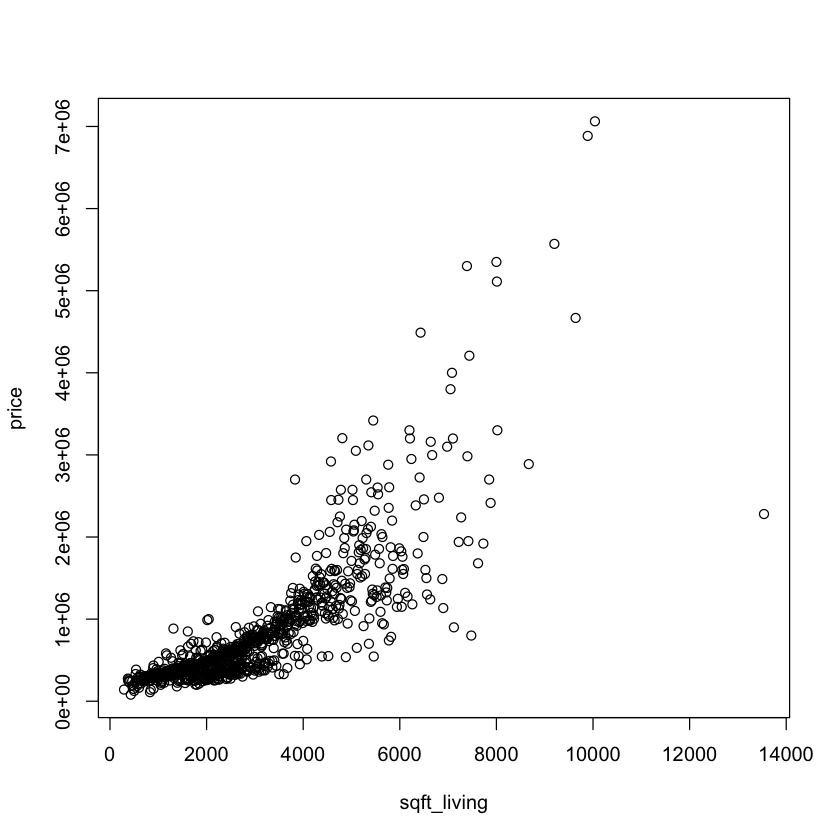

Warning message:
“‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’”Warning message in svg(tf, width, height, pointsize, FALSE, family, bg, antialias):
“failed to load cairo DLL”Warning message in file(con, "rb"):
“cannot open file '/var/folders/yc/6lt0vwc97cv8gskz51wl1p7r0000gn/T//RtmpaXazQF/file2abe63189e54.svg': No such file or directory”ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepar

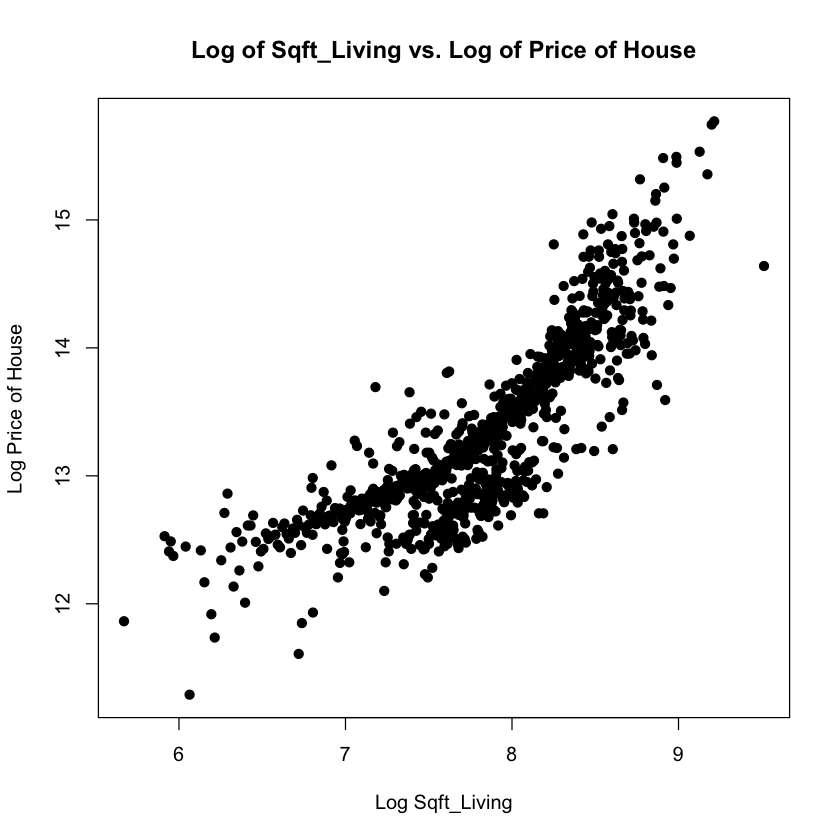

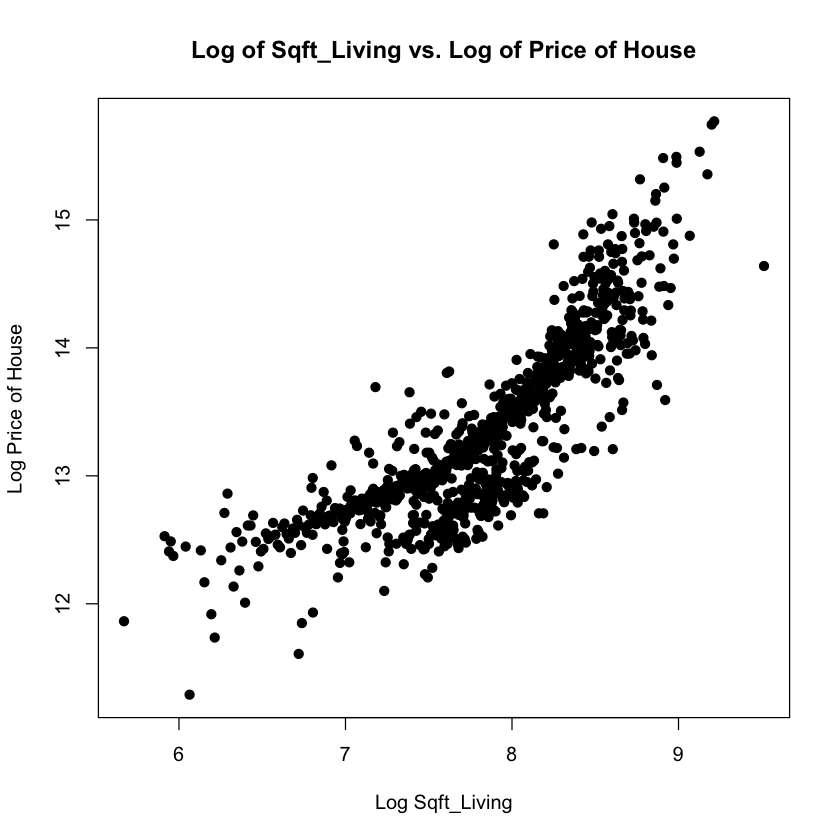

In [50]:
## I am using aggregated data as opposed to using the raw data. By "aggragated" data, I mean I take the mean for all the same sqft_living. It makes the graph cleaner.
plot(log(vec_price_sqftliving$sqft_living),log(vec_price_sqftliving$price), main="Log of Sqft_Living vs. Log of Price of House", xlab="Log Sqft_Living", ylab="Log Price of House", pch=19)
scatterplot2<-recordPlot()


scatterplot1 ## Regular Sqft Living vs Price Graph
scatterplot2 ## Log of Sqft living vs Log of Price Graph


In [51]:
## OLS performs poorly when there are big outliers and in scatterplot 1 there are many because of exponential behavior of the data. I would pick Model2 (can be seen in scatterplot2) because a linear line can explain the data more accurately since data looks linear.


Model1 <- lm(data=Training,price~sqft_living)
Model2 <- lm(data=Training,log(price)~log(sqft_living))

Beta0_Model1<-coef(Model1)[1]
Beta1_Model1<-coef(Model1)[2]
Beta0_Model2<-coef(Model2)[1]
Beta1_Model2<-coef(Model2)[2]
R_Squared_Model1<-summary(Model1)$r.squared
R_Squared_Model2<-summary(Model2)$r.squared

cat("Model1 coefficients and R-Squared:\nBeta0:",Beta0_Model1,"\nBeta1:",Beta1_Model1,"\nR-squared:",R_Squared_Model1)
cat("Model2 coefficients and R-Squared:\nBeta0:",Beta0_Model2,"\nBeta1:",Beta1_Model2,"\nR-squared:",R_Squared_Model2)



Model1 coefficients and R-Squared:
Beta0: -47538.66 
Beta1: 282.759 
R-squared: 0.497893Model2 coefficients and R-Squared:
Beta0: 6.701215 
Beta1: 0.8405552 
R-squared: 0.4583064

In [52]:

## I would compute MSE (Mean Squared Errors) to compare two different models.First I need to compute price_hats for my test data using the Model 1 and Model 2 coefficients. Then using mse function of package hydroGOF, I compute MSEs for my models.
price_hat_Model1<-predict(Model1,newdata=Test) ##Prediction using Model1
price_hat_Model2<-exp(predict(Model2,newdata=Test)) ##Prediction using Model2- notice that I had to take exponent of predict function because MODEL 2 returns log of predicted value.

MSE_Model1=mse(price_hat_Model1,Test$price) ## computing MSE for Model 1
MSE_Model2=mse(price_hat_Model2,Test$price) ## computing MSE for Model 2

cat("MSE for Model1:",MSE_Model1,"\nMSE for Model2:",MSE_Model2)

cat("MSE for Model 2 is ",round(100*(MSE_Model2/MSE_Model1-1),2),"% more than Model 1. Therefore I can safely suggest that Model 1 is better than Model 2.")


ERROR: Error in mse(price_hat_Model1, Test$price): could not find function "mse"


In [53]:
## Suggested variables:  bedrooms, bathrooms, log(sqft living), log(sqft lot), floors, waterfront, view, condition, grade, yr built, lat, long

## Creating Models using 1 variables each so total 12 Models. 
Model_PartE_1<-lm(log(price)~bedrooms,data=Training)
Model_PartE_2<-lm(log(price)~bathrooms,data=Training)
Model_PartE_3<-lm(log(price)~log(sqft_living),data=Training)
Model_PartE_4<-lm(log(price)~log(sqft_lot),data=Training)
Model_PartE_5<-lm(log(price)~floors,data=Training)
Model_PartE_6<-lm(log(price)~waterfront,data=Training)
Model_PartE_7<-lm(log(price)~view,data=Training)
Model_PartE_8<-lm(log(price)~condition,data=Training)
Model_PartE_9<-lm(log(price)~grade,data=Training)
Model_PartE_10<-lm(log(price)~yr_built,data=Training)
Model_PartE_11<-lm(log(price)~lat,data=Training)
Model_PartE_12<-lm(log(price)~long,data=Training)



In [54]:
## Predicting prices using each Model. Please note that I have to take exponent of predict function since it returns log of price.
price_hat_PartE_1<-exp(predict(Model_PartE_1,newdata=Test))
price_hat_PartE_2<-exp(predict(Model_PartE_2,newdata=Test))
price_hat_PartE_3<-exp(predict(Model_PartE_3,newdata=Test))
price_hat_PartE_4<-exp(predict(Model_PartE_4,newdata=Test))
price_hat_PartE_5<-exp(predict(Model_PartE_5,newdata=Test))
price_hat_PartE_6<-exp(predict(Model_PartE_6,newdata=Test))
price_hat_PartE_7<-exp(predict(Model_PartE_7,newdata=Test))
price_hat_PartE_8<-exp(predict(Model_PartE_8,newdata=Test))
price_hat_PartE_9<-exp(predict(Model_PartE_9,newdata=Test))
price_hat_PartE_10<-exp(predict(Model_PartE_10,newdata=Test))
price_hat_PartE_11<-exp(predict(Model_PartE_11,newdata=Test))
price_hat_PartE_12<-exp(predict(Model_PartE_12,newdata=Test))


In [56]:

## Computing SSE for each variable Models.
SSE_PartE_1<-sum((Test$price-price_hat_PartE_1)^2)
SSE_PartE_2<-sum((Test$price-price_hat_PartE_2)^2)
SSE_PartE_3<-sum((Test$price-price_hat_PartE_3)^2)
SSE_PartE_4<-sum((Test$price-price_hat_PartE_4)^2)
SSE_PartE_5<-sum((Test$price-price_hat_PartE_5)^2)
SSE_PartE_6<-sum((Test$price-price_hat_PartE_6)^2)
SSE_PartE_7<-sum((Test$price-price_hat_PartE_7)^2)
SSE_PartE_8<-sum((Test$price-price_hat_PartE_8)^2)
SSE_PartE_9<-sum((Test$price-price_hat_PartE_9)^2)
SSE_PartE_10<-sum((Test$price-price_hat_PartE_10)^2)
SSE_PartE_11<-sum((Test$price-price_hat_PartE_11)^2)
SSE_PartE_12<-sum((Test$price-price_hat_PartE_12)^2)


In [57]:
## Finding variable with min SSE
SSE<-c(SSE_PartE_1,SSE_PartE_2,SSE_PartE_3,SSE_PartE_4,SSE_PartE_5,SSE_PartE_6,SSE_PartE_7,SSE_PartE_8,SSE_PartE_9,SSE_PartE_10,SSE_PartE_11,SSE_PartE_12)
which(SSE==min(SSE)) ## SSE number 9 is the minimim SSE which is variable grade so it is the best predictor.
SSE_PartE_9

[1] 9

[1] 3.645139e+14

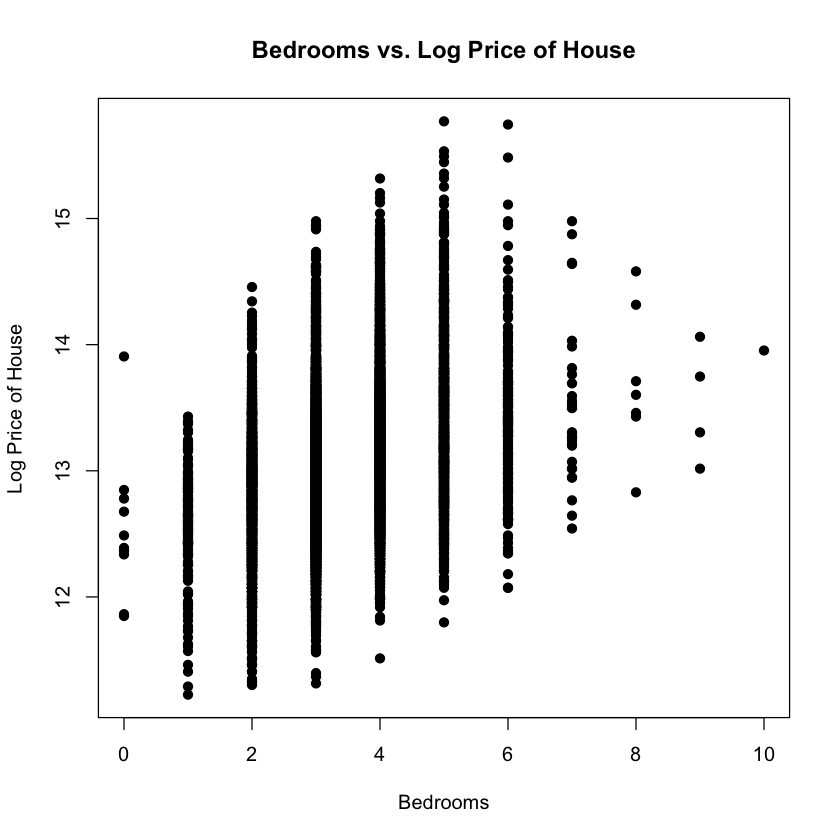

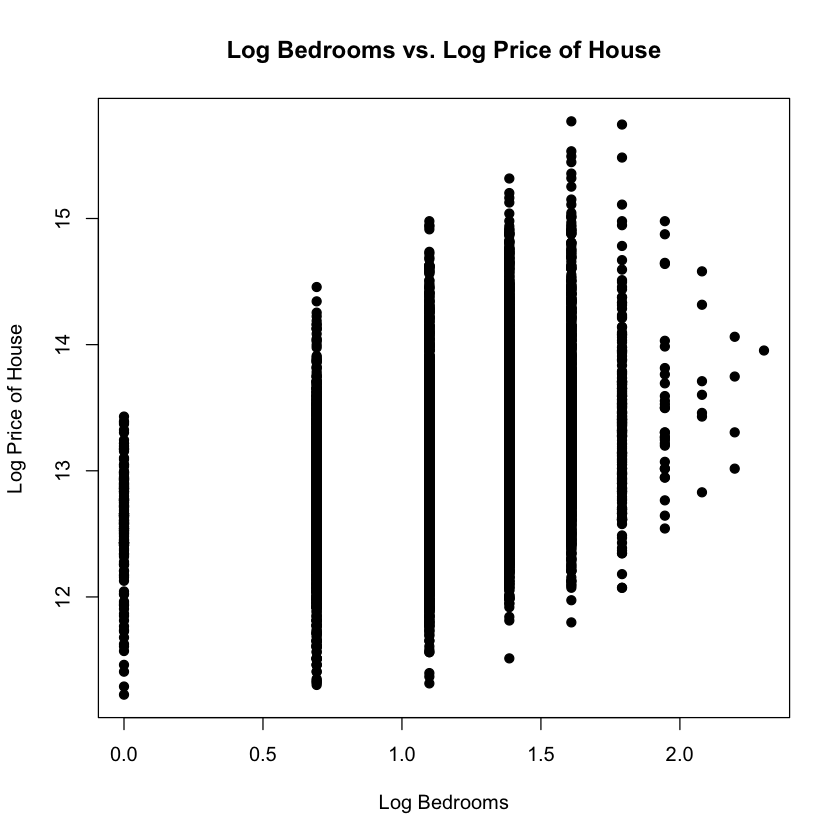

In [58]:

# Using Scatter Plots for Bedrooms vs Price:

plot(Training$bedroom,log(Training$price), main="Bedrooms vs. Log Price of House", xlab="Bedrooms", ylab="Log Price of House", pch=19)
plot(log(Training$bedroom),log(Training$price), main="Log Bedrooms vs. Log Price of House", xlab="Log Bedrooms", ylab="Log Price of House", pch=19)


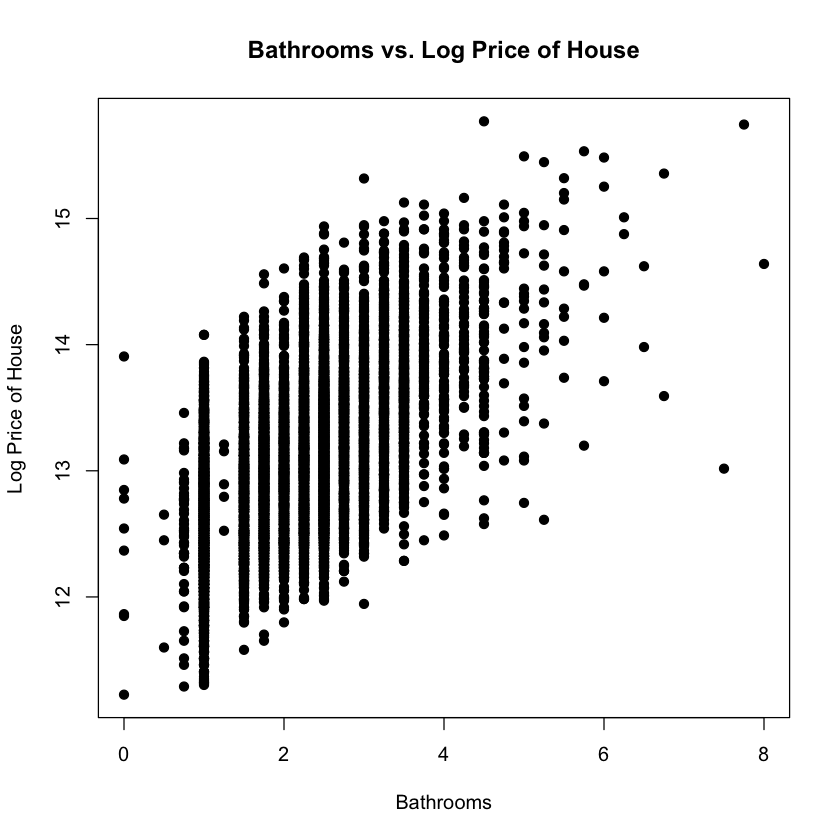

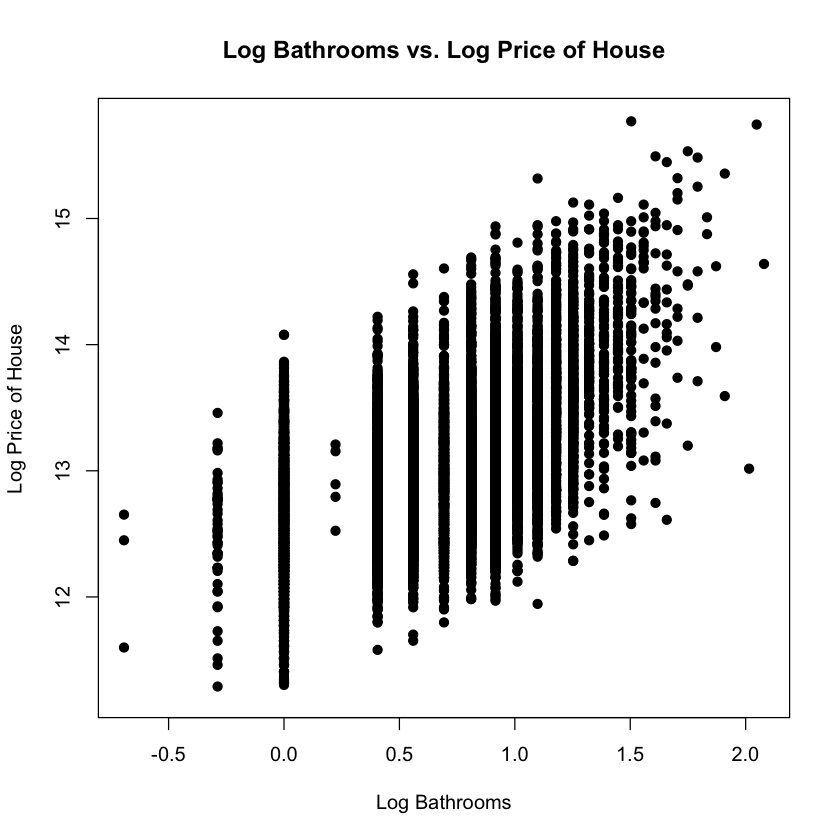

In [59]:
# Using Scatter Plots for Bathrooms vs Price:

plot(Training$bathrooms,log(Training$price), main="Bathrooms vs. Log Price of House", xlab="Bathrooms", ylab="Log Price of House", pch=19)
plot(log(Training$bathrooms),log(Training$price), main="Log Bathrooms vs. Log Price of House", xlab="Log Bathrooms", ylab="Log Price of House", pch=19)


In [60]:
## I think grade is good as it is, we should keep it in the current form.


Model3<-lm(log(price)~log(sqft_living)+bedrooms+bathrooms+grade+waterfront,data=Training)
summary(Model3)


Call:
lm(formula = log(price) ~ log(sqft_living) + bedrooms + bathrooms + 
    grade + waterfront, data = Training)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31107 -0.25173  0.00052  0.23204  1.32069 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.088635   0.074896 107.998  < 2e-16 ***
log(sqft_living)  0.471449   0.013031  36.180  < 2e-16 ***
bedrooms         -0.025905   0.004099  -6.320 2.68e-10 ***
bathrooms        -0.009966   0.005720  -1.742   0.0815 .  
grade             0.196244   0.003687  53.226  < 2e-16 ***
waterfront        0.631857   0.032958  19.171  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3501 on 16204 degrees of freedom
Multiple R-squared:  0.5611,	Adjusted R-squared:  0.561 
F-statistic:  4143 on 5 and 16204 DF,  p-value: < 2.2e-16


In [61]:
## Assigning coefficients and R-squared
Beta0_Model3<-coef(Model3)[1]
Beta1_Model3<-coef(Model3)[2]
Beta2_Model3<-coef(Model3)[3]
Beta3_Model3<-coef(Model3)[4]
Beta4_Model3<-coef(Model3)[5]
Beta5_Model3<-coef(Model3)[6]
R_Squared_Model3<-summary(Model3)$r.squared

cat("Model3 coefficients and R-Squared:\nBeta0:",Beta0_Model3,"\nBeta1:",Beta1_Model3,"\nBeta2:",Beta2_Model3,"\nBeta3:",Beta3_Model3,"\nBeta4:",Beta4_Model3,"\nBeta5:",Beta5_Model3,"\nR-squared:",R_Squared_Model3)

cat("R-Squared for Model 3 is ",100*(R_Squared_Model3/R_Squared_Model2-1),"% better than Model 2.\nR-squared for Model 3 and Model 2 are:",R_Squared_Model3,"and",R_Squared_Model2,"respectively.")


Model3 coefficients and R-Squared:
Beta0: 8.088635 
Beta1: 0.4714487 
Beta2: -0.02590494 
Beta3: -0.009965754 
Beta4: 0.1962435 
Beta5: 0.6318567 
R-squared: 0.5611128R-Squared for Model 3 is  22.43181 % better than Model 2.
R-squared for Model 3 and Model 2 are: 0.5611128 and 0.4583064 respectively.

In [62]:

## MSE is a good method to compare different models. I already compute MSE for Model 2 which is:
MSE_Model2

## Now I need to compute MSE for Model 3

price_hat_Model3<-exp(predict(Model3,newdata=Test)) ##Prediction using Model3- notice that I had to take exponent of predict function because MODEL 3 returns log of predicted value

MSE_Model3=mse(price_hat_Model3,Test$price) ## computing MSE for Model 3

cat("MSE for Model2:",MSE_Model2,"\nMSE for Model3:",MSE_Model3)

cat("MSE for Model 2 is ",round(100*(MSE_Model2/MSE_Model3-1),2),"% more than Model 3. Therefore I can safely suggest that Model 3 is better than Model 2.")


ERROR: Error in eval(expr, envir, enclos): object 'MSE_Model2' not found


In [65]:

Model4<-lm(log(price)~log(sqft_living)+bedrooms+bathrooms+grade+waterfront+yr_built+lat,data=Training)
summary(Model4)

## Assigning coefficients and R-squared
Beta0_Model4<-coef(Model4)[1]
Beta1_Model4<-coef(Model4)[2]
Beta2_Model4<-coef(Model4)[3]
Beta3_Model4<-coef(Model4)[4]
Beta4_Model4<-coef(Model4)[5]
Beta5_Model4<-coef(Model4)[6]
Beta6_Model4<-coef(Model4)[7]
Beta7_Model4<-coef(Model4)[8]
R_Squared_Model4<-summary(Model4)$r.squared

cat("Model4 coefficients and R-Squared:\nBeta0:",Beta0_Model4,"\nBeta1:",Beta1_Model4,"\nBeta2:",Beta2_Model4,"\nBeta3:",Beta3_Model4,"\nBeta4:",Beta4_Model4,"\nBeta5:",Beta5_Model4,"\nBeta6:",Beta6_Model4,"\nBeta7:",Beta7_Model4,"\nR-squared:",R_Squared_Model4)

cat("R-Squared for Model 4 is ",100*(R_Squared_Model4/R_Squared_Model3-1),"% better than Model 3.\nR-squared for Model 4 and Model 3 are:",R_Squared_Model4,"and",R_Squared_Model3,"respectively.")



Call:
lm(formula = log(price) ~ log(sqft_living) + bedrooms + bathrooms + 
    grade + waterfront + yr_built + lat, data = Training)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29278 -0.16686 -0.00192  0.16025  1.28311 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.625e+01  7.993e-01  -57.86   <2e-16 ***
log(sqft_living)  4.368e-01  9.917e-03   44.04   <2e-16 ***
bedrooms         -3.259e-02  3.112e-03  -10.47   <2e-16 ***
bathrooms         8.790e-02  4.642e-03   18.93   <2e-16 ***
grade             1.956e-01  2.890e-03   67.68   <2e-16 ***
waterfront        5.851e-01  2.502e-02   23.39   <2e-16 ***
yr_built         -4.309e-03  8.743e-05  -49.28   <2e-16 ***
lat               1.323e+00  1.556e-02   85.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2645 on 16202 degrees of freedom
Multiple R-squared:  0.7495,	Adjusted R-squared:  0.7494 
F-statistic:  6926 on

Model4 coefficients and R-Squared:
Beta0: -46.24986 
Beta1: 0.4367578 
Beta2: -0.03259184 
Beta3: 0.08789524 
Beta4: 0.1956249 
Beta5: 0.5851422 
Beta6: -0.004308889 
Beta7: 1.322831 
R-squared: 0.7495081R-Squared for Model 4 is  33.5753 % better than Model 3.
R-squared for Model 4 and Model 3 are: 0.7495081 and 0.5611128 respectively.